## This script will create pdfs of both model output and TRMM data for certain gridpoints

In [90]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import glob
import re

In [78]:
trmm14=xr.open_dataset('../parameterization_exp/trmm_2014_JunAug.nc')
trmm15=xr.open_dataset('../parameterization_exp/trmm_2015_JunAug.nc')
ti,la,lo=np.shape(trmm14.PPT)
trmm=np.zeros([184,la,lo])
trmm[:92,:,:]=trmm14.PPT
trmm[92:,:,:]=trmm15.PPT

In [79]:
chiangsaen_loc={'lat':20.27416667,'lon':100.09083333}
mukdahan_loc={'lat':16.54000000,'lon':104.73666667}
kratie_loc={'lat':12.47666667,'lon':106.01500000}
print(chiangsaen_loc['lat'])

20.27416667


In [96]:
def pos(loc,frame):
    for i,val in enumerate(frame.lat.data):
        if loc['lat']<val:
            ilat=i-1
            break
    for j,val in enumerate(frame.lon.data):
        if loc['lon']<val:
            ilon=j-1
            break
    return ilat,ilon

In [144]:
def plotpdf(loc,data,frame,title):
    ilat,ilon=pos(loc,frame)
    val=pd.DataFrame(data[:,ilat,ilon])
    ax=plt.subplot(1,3,1)
    ax=val.plot.density()
#     ax.set_title(title)
#     ax1=val.plot.hist(ylim=[0,200],xlim=[0.01,80],bins=20)
#     ax1.set_title(title)

## Plot PDF and histogram of precipitation from TRMM output using selected locations

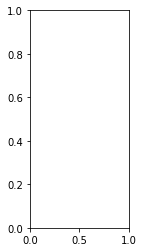

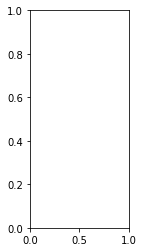

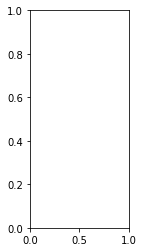

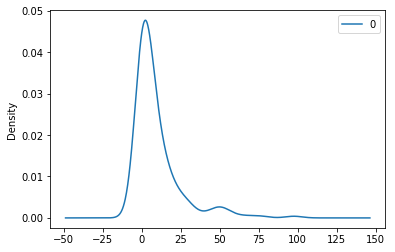

In [145]:
plotpdf(chiangsaen_loc,trmm,trmm14,'chiangsaen')
plotpdf(mukdahan_loc,trmm,trmm14,'mukdahan')
plotpdf(kratie_loc,trmm,trmm14,'kratie')
plt.show()

## Plot histograms and PDF for all WRF experiment outputs

rearranging files
working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc
working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc
working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc
working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc
working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc
working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc
working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/w

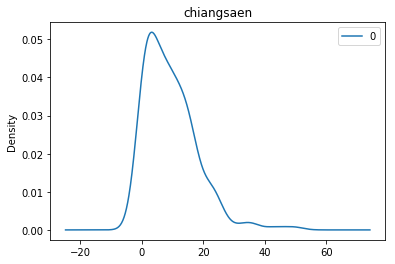

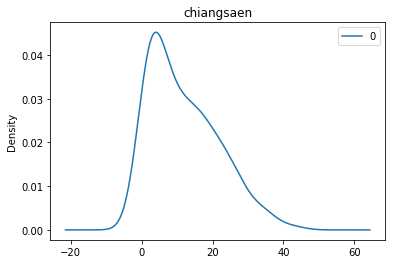

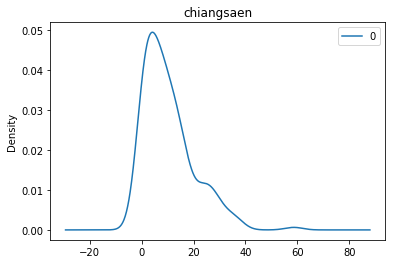

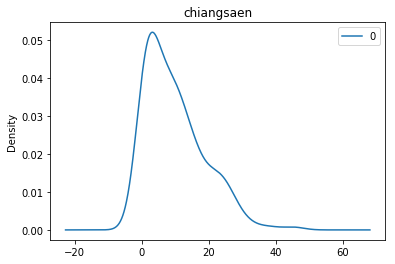

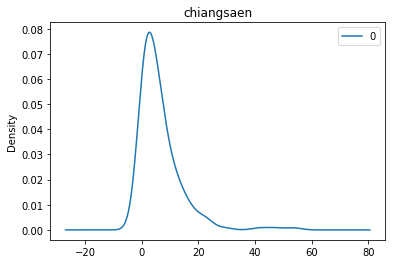

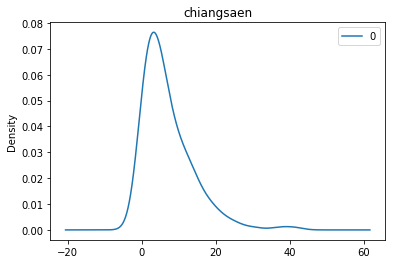

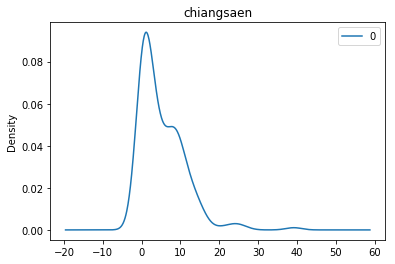

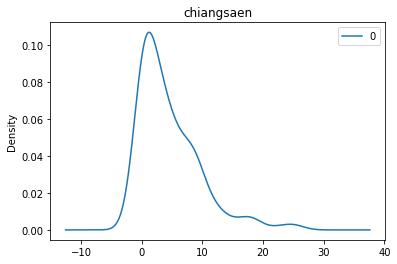

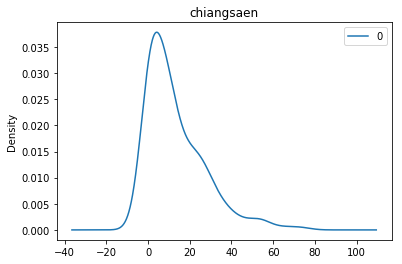

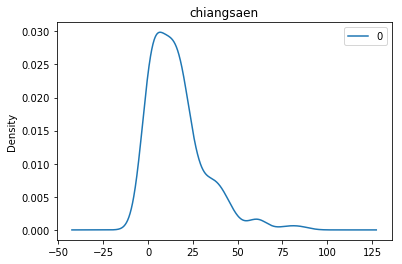

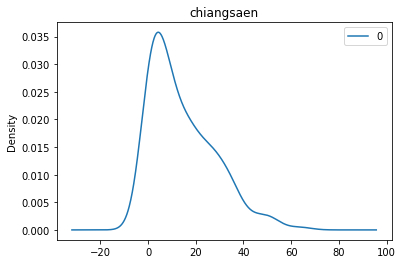

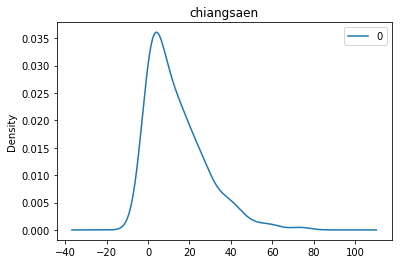

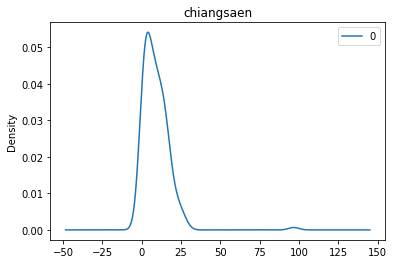

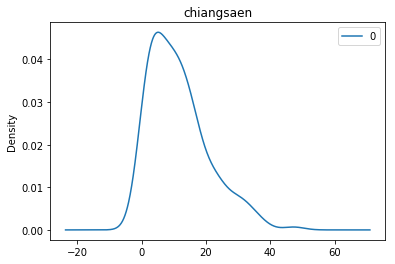

In [110]:
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d01.nc'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d01.nc'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    plotpdf(chiangsaen_loc,ppt,wrf2014,'chiangsaen')
    
plt.show()